In [1]:
%config Completer.use_jedi=False

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
data = load_iris()

In [4]:
X = data["data"]
y = data["target"]

In [5]:
df = pd.DataFrame(X, columns=data["feature_names"])

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df["label"] = y

In [8]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
66,5.6,3.0,4.5,1.5,1
57,4.9,2.4,3.3,1.0,1
111,6.4,2.7,5.3,1.9,2
48,5.3,3.7,1.5,0.2,0
6,4.6,3.4,1.4,0.3,0


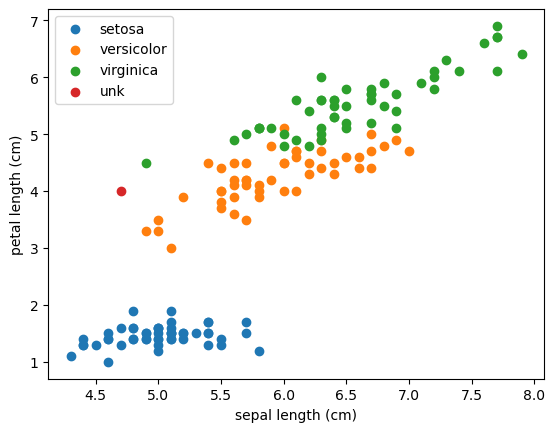

In [9]:
for i in range(3):
    plt.scatter(
        df.loc[df["label"] == i]["sepal length (cm)"], 
        df.loc[df["label"] == i]["petal length (cm)"],
        label=data["target_names"][i]
    )
plt.scatter([4.7], [4], label="unk")
plt.xlabel("sepal length (cm)")
plt.ylabel("petal length (cm)")
plt.legend()

In [46]:
X.ndim, y.ndim

(2, 1)

In [10]:
class NN:
    
    def __init__(self):
        self.X = None
        self.y = None
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        """
        self.X (N, 4)
        X (1, 4)
        """

        square_coords = (self.X - X) ** 2
        distances = square_coords.sum(1)
        min_index = np.argmin(distances)
        return self.y[min_index: min_index + 1]

In [52]:
train_X, test_X, train_y, test_y = train_test_split(
    X, y, test_size=0.2, shuffle=True, random_state=42
)

In [53]:
model = NN()

In [54]:
model.fit(train_X, train_y)

In [56]:
l = [1, 2, 3]

In [57]:
l[0]

1

In [58]:
l[0:1]

[1]

In [14]:
y_preds = []
for i in range(test_X.shape[0]):
    sample = test_X[i: i+1, :]
    prediction = model.predict(sample)
    y_preds.extend(prediction)

In [59]:
test_y

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [61]:
np.array(y_preds)

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [63]:
def test_model(X, y):
    train_X, test_X, train_y, test_y = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )
    model = NN()
    model.fit(train_X, train_y)
    y_preds = []
    for i in range(test_X.shape[0]):
        sample = test_X[i: i+1, :]
        prediction = model.predict(sample)
        y_preds.extend(prediction)
    return (test_y == np.array(y_preds)).sum() / test_y.shape[0]

In [64]:
test_model(X, y)

1.0

In [65]:
X_break = X.copy()

In [66]:
X_break[:, 0] *= 100

In [67]:
test_model(X_break, y)

0.8333333333333334

In [23]:
def test_model_scaled(X, y):
    train_X, test_X, train_y, test_y = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )
    scaler = MinMaxScaler()
    scaler.fit(train_X)
    scaled_train_X = scaler.transform(train_X)
    model = NN()
    model.fit(scaled_train_X, train_y)
    y_preds = []
    scaled_test_X = scaler.transform(test_X)
    for i in range(test_X.shape[0]):
        sample = scaled_test_X[i: i+1, :]
        prediction = model.predict(sample)
        y_preds.extend(prediction)
    return (test_y == np.array(y_preds)).sum() / test_y.shape[0]

In [29]:
test_model_scaled(X, y)

1.0

In [30]:
test_model_scaled(X_break, y)

1.0

In [68]:
class KNN:
    
    def __init__(self, k):
        self.k = k
        self.X = None
        self.y = None
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):

        square_coords = (self.X - X) ** 2
        distances = square_coords.sum(1)
        min_indexes = np.argsort(distances)[:self.k]
        values, counts = np.unique(self.y[min_indexes], return_counts=True)
        max_count = np.argmax(counts)
        return values[max_count: max_count + 1]

In [69]:
def test_model_scaled_knn(X, y, k=3):
    train_X, test_X, train_y, test_y = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42
    )
    scaler = MinMaxScaler()
    scaler.fit(train_X)
    scaled_train_X = scaler.transform(train_X)
    model = KNN(k)
    model.fit(scaled_train_X, train_y)
    y_preds = []
    scaled_test_X = scaler.transform(test_X)
    for i in range(test_X.shape[0]):
        sample = scaled_test_X[i: i+1, :]
        prediction = model.predict(sample)
        y_preds.extend(prediction)
    return (test_y == np.array(y_preds)).sum() / test_y.shape[0]

In [70]:
test_model_scaled_knn(X, y, 1)

1.0

In [71]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))